# Fine-tuning keras models
  
Learn how to optimize your deep learning models in Keras. Start by learning how to validate your models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks.

## Resources
  
**Notebook Syntax**
  
<span style='color:#7393B3'>NOTE:</span>  
- Denotes additional information deemed to be *contextually* important
- Colored in blue, HEX #7393B3
  
<span style='color:#E74C3C'>WARNING:</span>  
- Significant information that is *functionally* critical  
- Colored in red, HEX #E74C3C
  
---
  
**Links**
  
[NumPy Documentation](https://numpy.org/doc/stable/user/index.html#user)  
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)  
[Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
[Seaborn Documentation](https://seaborn.pydata.org)  
[TensorFlow Documentation](https://www.tensorflow.org)  
  
---
  
**Notable Functions**
  
<table>
  <tr>
    <th>Index</th>
    <th>Operator</th>
    <th>Use</th>
  </tr>
  <tr>
    <td>1</td>
    <td>numpy.array()</td>
    <td>Creates an array. An array is a grid of values and it contains information about the raw data, how to locate an element, and how to interpret an element. It has a grid of elements that can be indexed in various ways.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>tensorflow.keras.utils.to_categorical()</td>
    <td>Converts a class vector (integer labels) to binary class matrix. It is commonly used for one-hot encoding of categorical variables in deep learning tasks.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>tensorflow.keras.Sequential</td>
    <td>Creates a sequential model in Keras, which is a linear stack of layers. This is the most common type of model in deep learning, where each layer is connected to the next in a sequential manner.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>tensorflow.keras.layers.Dense()</td>
    <td>A fully connected layer in a neural network. Dense layers are the most common type of layer used in deep learning models. They have a set of learnable weights and biases and each neuron is connected to every neuron in the previous layer.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>model.compile()</td>
    <td>Compiles a Keras model. It configures the model for training by specifying the optimizer, loss function, and evaluation metrics. This step is required before training a model.</td>
  </tr>
    <tr>
    <td>6</td>
    <td>tensorflow.keras.callbacks.EarlyStopping</td>
    <td>Stop training when a monitored metric has stopped improving.</td>
  </tr>
</table>
  

---
  
**Language and Library Information**  
  
Python 3.11.0  
  
Name: numpy  
Version: 1.24.3  
Summary: Fundamental package for array computing in Python  
  
Name: pandas  
Version: 2.0.3  
Summary: Powerful data structures for data analysis, time series, and statistics  
  
Name: matplotlib  
Version: 3.7.2  
Summary: Python plotting package  
  
Name: seaborn  
Version: 0.12.2  
Summary: Statistical data visualization  
  
Name: tensorflow  
Version: 2.13.0  
Summary: TensorFlow is an open source machine learning framework for everyone.  
  
---
  
**Miscellaneous Notes**
  
<span style='color:#7393B3'>NOTE:</span>  
  
`python3.11 -m IPython` : Runs python3.11 interactive jupyter notebook in terminal.
  
`nohup ./relo_csv_D2S.sh > ./output/relo_csv_D2S.log &` : Runs csv data pipeline in headless log.  
  
`print(inspect.getsourcelines(test))` : Get self-defined function schema  
  


In [60]:
import numpy as np                  # Numerical Python:         Arrays and linear algebra
import pandas as pd                 # Panel Datasets:           Dataset manipulation
import matplotlib.pyplot as plt     # MATLAB Plotting Library:  Visualizations
import seaborn as sns               # Seaborn:                  Visualizations
import tensorflow as tf             # TensorFlow:               Deep-Learning Neural Networks


## Understanding model optimization
  
At this point, you have a good understanding of how neural networks work, and how to build them in Keras. But you probably don't yet have a great intuition for how to choose things like model architecture and model optimization arguments. You'll learn that in this last chapter.
  
**Why optimization is hard**
  
In practice, optimization is a hard problem. The optimal value for any one weight depends on the values of the other weights, and we are optimizing many weights at once. Even if the slope tells us which weights to increase, and which to decrease, our updates may not improve our model meaningfully. A small learning rate might cause us to make such small updates to the model's weights that our model doesn't improve materially. A very large learning rate might take us too far in the direction that seemed good. A smart optimizer like Adam helps, but optimization problems can still occur. 
  
**Why is optimization hard?**  
  
- Simultaneously optimizing 1000s of parameters with complex relationships
- Updates may not improve model meaningfully
- Updates too small (if learning rate is low) or too large (if learning rate is high)
  
**Stochastic gradient descent**
  
The easiest way to see the effect of different learning rates is to use the simplest optimizer, Stochastic Gradient Descent, sometimes abbreviated to SGD. This optimizer uses a fixed learning rate. Learning rates around 0.01 are common. But you can specify the learning rate you need with `learning_rate=` argument as shown here. We have a function that creates a new model here. We create models in a for loop, and each time around we compile the model using SGD with a different `learning_rate`. We pass in the `optimizer=` with the same argument where we previously passed the string for `"adam"`. In an exercise, you will compare the results of training models trained with low, medium and high learning rates.
  
<img src='../_images/understanding-model-optimization-neural-nets.png' alt='img' width='550'>
  
**The dying neuron problem**
  
Even if your `learning_rate=` is well tuned, you can run into the so-called "dying-neuron" problem. This problem occurs when a neuron takes a value less than 0 for all rows of your data. Recall that, with the ReLU activation function, any node with a negative input value produces an output of 0, and it also has a slope of 0 as you see in this graph. Because the slope is 0, the slope of any weights flowing into that node are also 0. So those weights don't get updated. In other words, once the node starts always getting negative inputs, it may continue only getting negative inputs. It's contributing nothing to the model at this point, and hence the claim that the node or neuron is "dead."At first, this might suggest using an activation function whose slope is never exactly zero. However, those types of functions were used for many years.
  
**Vanishing gradients**
  
For example, in an earlier video we used an s-shaped function called tanh. However, values that were outside the middle of the S were relatively flat, or had small slopes. 
  
**Vanishing gradients**
  
A small but non-zero slope might work in a network with only a few hidden layers. But in a deep network, one with many layers, the repeated multiplication of small slopes causes the slopes to get close to 0, which meant updates in backprop were close to 0. This is called the *vanishing gradient* problem. This in turn might suggest using an activation function that isn't even close to flat anywhere. There is research in this area, including variations on ReLU. Those aren't widely used though. For now, it's a phenomenon worth keeping in mind if you are ever pondering why your model isn't training better. If it happens, changing the activation function may be the solution.
  
**Vanishing gradients**
  
- Occurs when many layers have very small slopes (e.g. due to being on flat part of tanh curve)
- In deep networks, updates to backprop were close to 0

### Diagnosing optimization problems
  
Which of the following could prevent a model from showing an improved loss in its first few epochs?
  
Possible Answers

- [ ] Learning rate too low.
- [ ] Learning rate too high.
- [ ] Poor choice of activation function.
- [x] All of the above.
  
Well done! All the options listed could prevent a model from showing an improved loss in its first few epochs.'

### Changing optimization parameters
  
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.
  
For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function `get_new_model()` that creates an unoptimized model to optimize.
  
1. Import `SGD` from `tensorflow.keras.optimizers`.
2. Create a list of learning rates to try optimizing with called `lr_to_test`. The learning rates in it should be .000001, 0.01, and 1.
3. Using a `for` loop to iterate over `lr_to_test`:
- Use the `get_new_model()` function to build a new, unoptimized model.
- Create an optimizer called `my_optimizer` using the `SGD()` constructor with keyword argument `learning_rate=lr`.
- Compile your model. Set the `optimizer=` parameter to be the `SGD` object you created above, and because this is a classification problem, use `'categorical_crossentropy'` for the `loss=` parameter.
- Fit your model using the `predictors` and `target`.

In [61]:
df = pd.read_csv('../_datasets/titanic_all_numeric.csv')
print(df.shape)
df.head()

(891, 11)


,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [62]:
# X/y split
predictors = df.iloc[:, 1:].astype(np.float32).to_numpy()
target = tf.keras.utils.to_categorical(df.iloc[:, 0].astype(np.float32).to_numpy())

In [63]:
# Defining the input shape of the features for the model pipeline as a tuple
input_shape = (predictors.shape[1], )

# Model development
def get_new_model(input_shape=input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return model



In [64]:
# Create list of learning rates: lr_to_test
learning_rate_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for learning_rate in learning_rate_to_test:
    print('\n\nTesting model with learning rate: {}\n'.format(learning_rate))
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    model.fit(predictors, target, epochs=10)





Testing model with learning rate: 1e-06

Epoch 1/10


28/28 [==============================] - 3s 4ms/step - loss: 2.5878 - accuracy: 0.6162
Epoch 2/10
28/28 [==============================] - 0s 5ms/step - loss: 2.5680 - accuracy: 0.6162
Epoch 3/10
28/28 [==============================] - 1s 11ms/step - loss: 2.5483 - accuracy: 0.6162
Epoch 4/10
28/28 [==============================] - 0s 5ms/step - loss: 2.5287 - accuracy: 0.6162
Epoch 5/10
28/28 [==============================] - 0s 8ms/step - loss: 2.5092 - accuracy: 0.6162
Epoch 6/10
28/28 [==============================] - 0s 9ms/step - loss: 2.4899 - accuracy: 0.6162
Epoch 7/10
28/28 [==============================] - 0s 6ms/step - loss: 2.4707 - accuracy: 0.6162
Epoch 8/10
28/28 [==============================] - 0s 7ms/step - loss: 2.4518 - accuracy: 0.6162
Epoch 9/10
28/28 [==============================] - 0s 4ms/step - loss: 2.4329 - accuracy: 0.6162
Epoch 10/10
28/28 [==============================] - 0s 8ms/step - loss: 2.4142 - accuracy: 0.6162


Testing model with learning

It looks like the learning rate of 0.01 provided the best result

## Model validation
  
You may recall from previous machine learning classes that your model's performance on the training data is not a good indication of how it will perform on new data. For this reason, we use validation data to test model performance. Validation data is data that is explicitly held out from training, and used only to test model performance.
  
**Validation in deep learning**
  
You may already be familiar with k-fold cross validation. In practice, few people run k-fold cross validation on deep learning models because deep learning is typically used on large datasets. So the computational expense of running k-fold validation would be large, and we usually trust a score from a single validation run because those validation runs are reasonably large. Keras makes it easy to use some of your data as validation data, and we see that
  
**Validation in deep learning**
  
- Commonly use validation split rather than cross-validation
- Deep learning widely used on large datasets
- Single validation score is based on large amount of data, and is reliable
  
**Model validation**
  
in this code, where we specify the split using the keyword argument `validation_split=` when calling the `.fit()` method. Here, we have already specified a model, and we'll make small changes in both the `model.compile()` and `.fit()` steps to see model validation information. This is a classification problem, and we'd like to see measures of accuracy. So, we include `metrics='accuracy'` in the `model.compile()` step. In the `.fit()` step, we specify what fraction of the data is used for validation. In this case, we'll use 30%. Our goal is to have the best validation score possible, so we should keep training while validation score is improving, and then stop training when the validation score isn't improving. 
  
<img src='../_images/model-validation-in-deep-learning-neural-net.png' alt='img' width='550'>
  
**Early Stopping**
  
We do this with something called "early stopping." We can use early stopping with only some small changes to the code. See here, we've imported something called `EarlyStopping`. We then create an "early stopping monitor" before fitting the model. That monitor takes an argument called `patience=`, which is how many epochs the model can go without improving before we stop training. 2 or 3 are reasonable values for `patience=`. Sometimes you'll get a single epoch with no improvement, but the model will start improving again after that epoch. But if you see 3 epochs with no improvement, it's unlikely to turn around and start improving again. We pass `early_stopping_monitor` to the `.fit()` function under an argument called `callbacks=`. Notice that `callbacks=` takes a list. You may consider adding other `callbacks=` as you become very advanced. But early stopping is all you want for now. By default, `keras` trains for 10 `epochs=`. Now that we have smart logic for determining when to stop, we can set a high maximum number of `epochs=`. This happens with the `epochs=` argument, as you see here. Keras will go until this number of `epochs=`, unless the validation loss stops improving, in which case it will stop earlier. This is smarter training logic than relying on a fixed number of `epochs=` without looking at the validation scores.
  
<img src='../_images/model-validation-in-deep-learning-neural-net1.png' alt='img' width='550'>
  
**Output from early stopping**
  
Let's look at the output. In epoch 9 we had a validation loss score of 0.6513. We didn't beat that score in the next 2 `epochs=`, so we stopped training. Now that you have a reliable way of measuring model performance, namely through scores, you should feel free to experiment with different architectures. 
  
<img src='../_images/model-validation-in-deep-learning-neural-net2.png' alt='img' width='550'>
  
**Experimentation**
  
More layers, fewer layers. Layers with more nodes, layers with fewer nodes. And so on. Creating a great model requires some experimentation. Before we finish, we'll give a little bit of insight into how to choose where you experiment. But, now that you can get validation scores, you are poised to run those experiments and figure out what works best for your data.
  
**Experiment with different architectures**
- More layers
- Fewer layers
- Layers with more nodes
- Layers with fewer nodes
- Creating a great model requires experimentation

### Evaluating model accuracy on validation dataset
  
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as `model`. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.
  
1. Compile your model using `'adam'` as the `optimizer=` and `'categorical_crossentropy'` for the `loss=`. To see what fraction of predictions are correct (the `accuracy`) in each epoch, specify the additional keyword argument `metrics=['accuracy']` in `model.compile()`.
2. Fit the model using the `predictors` and `target`. Create a validation split of 30% (or 0.3). This will be reported in each epoch.

In [65]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape = input_shape))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 3s 38ms/step - loss: 0.8449 - accuracy: 0.6003 - val_loss: 1.0130 - val_accuracy: 0.5336


Great work

### Early stopping: Optimizing the optimization
  
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to `.fit()`.
  
The model you'll optimize has been specified as model. As before, the data is pre-loaded as `predictors` and `target`.
  
1. Import `EarlyStopping` from `tensorflow.keras.callbacks`.
2. Compile the model, once again using `'adam'` as the `optimizer=`, `'categorical_crossentropy'` as the `loss=` function, and `metrics=['accuracy']` to see the accuracy at each epoch.
3. Create an `EarlyStopping` object called `early_stopping_monitor`. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the patience parameter of `EarlyStopping()` to be 2.
4. Fit the model using the `predictors` and `target`. Specify the number of `epochs=` to be 30 and use a `validation_split=` of 0.3. In addition, pass `[early_stopping_monitor]` to the `callbacks=` parameter.

In [66]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape = input_shape))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 2s 24ms/step - loss: 1.0294 - accuracy: 0.6212 - val_loss: 0.7893 - val_accuracy: 0.6418
Epoch 2/30
20/20 [==============================] - 0s 7ms/step - loss: 0.7963 - accuracy: 0.5778 - val_loss: 0.5352 - val_accuracy: 0.7575
Epoch 3/30
20/20 [==============================] - 0s 19ms/step - loss: 0.6760 - accuracy: 0.6453 - val_loss: 0.5928 - val_accuracy: 0.6493
Epoch 4/30
20/20 [==============================] - 0s 10ms/step - loss: 0.6432 - accuracy: 0.6693 - val_loss: 0.5238 - val_accuracy: 0.7388
Epoch 5/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6315 - accuracy: 0.6501 - val_loss: 0.5370 - val_accuracy: 0.6828
Epoch 6/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6107 - accuracy: 0.6854 - val_loss: 0.5812 - val_accuracy: 0.7351


Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of `epochs=` as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 4 epochs.

### Experimenting with wider networks
  
Now you know everything you need to begin experimenting with different models!
  
A model called `model_1` has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.
  
In this exercise you'll create a new model called `model_2` which is similar to `model_1`, except it has 100 units in each hidden layer.
  
After you create `model_2`, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument `verbose=False` in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.
  
Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.
  
1. Create `model_2` to replicate `model_1`, but use 100 nodes instead of 10 for the first two Dense layers you add with the `'relu'` activation. Use 2 nodes for the Dense output layer with `'softmax'` as the activation.
2. Compile `model_2` as you have done with previous models: Using `'adam'` as the `optimizer=`, 'categorical_crossentropy' for the loss, and `metrics=['accuracy']`.
3. Run to fit both the models and visualize which one gives better results! Notice the keyword argument `verbose=False` in `model.fit()`: This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

In [67]:
# Creating the model in the exercise
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(10, activation='relu', input_shape=input_shape))
model_1.add(tf.keras.layers.Dense(10, activation='relu'))
model_1.add(tf.keras.layers.Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model_1.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 10)                110       
                                                                 
 dense_138 (Dense)           (None, 10)                110       
                                                                 
 dense_139 (Dense)           (None, 2)                 22        
                                                                 
Total params: 242 (968.00 Byte)
Trainable params: 242 (968.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


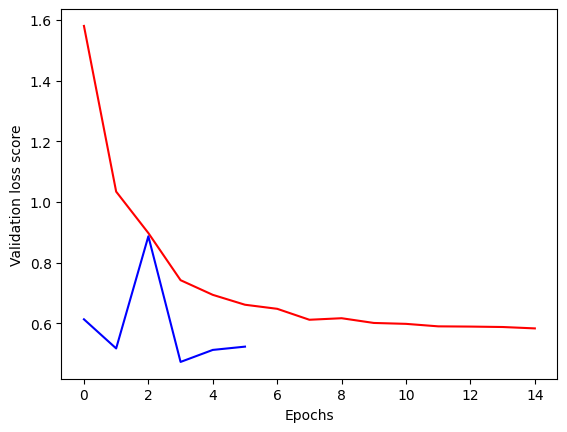

In [69]:
# Define early_stopping_monitor
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = tf.keras.Sequential()

# Add the first and second layers
model_2.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
model_2.add(tf.keras.layers.Dense(100, activation='relu'))

# Add the output layer
model_2.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation loss score')
plt.show()

The blue model is `model_2`, the red is the original model, `model_1`.  
`model_2` had a lower loss value, so it is the better model. Nice job!  

### Adding layers to a network
  
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).
  
Once again, you have a baseline model called `model_1` as a starting point. It has 1 hidden layer, with 10 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 10 units in each layer).
  
This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.
  
1. Specify a model called `model_2` that is like `model_1`, but which has 3 hidden layers of 10 units instead of only 1 hidden layer.
2. Use `input_shape` to specify the input shape in the first hidden layer.
3. Use `'relu'` activation for the 3 hidden layers and `'softmax'` for the output layer, which should have 2 units.
4. Compile `model_2` as you have done with previous models: Using 'adam' as the optimizer, `'categorical_crossentropy'` for the `loss=`, and `metrics=['accuracy']`.
5. Run to fit both the models and visualize which one gives better results!

In [70]:
# Creating model_1, overwriting jupyter variable for it
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(10, activation='relu', input_shape=input_shape))
model_1.add(tf.keras.layers.Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
model_1.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 10)                110       
                                                                 
 dense_144 (Dense)           (None, 2)                 22        
                                                                 
Total params: 132 (528.00 Byte)
Trainable params: 132 (528.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


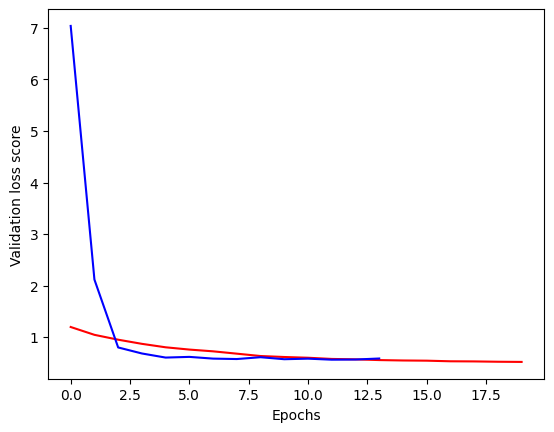

In [72]:
# The input shape to use in the first hidden layer
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = tf.keras.Sequential()

# Add the first, second, and third hidden layers
model_2.add(tf.keras.layers.Dense(10, activation='relu', input_shape=input_shape))
model_2.add(tf.keras.layers.Dense(10, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='relu'))

# Add the output layer
model_2.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation loss score')
plt.show()

The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.

## Thinking about model capacity
  
At this point, you know how to run experiments, and compare different models performance. However, it takes some practice to get an intuition for what experiments or architectures to try. There is still a little more art to finding good deep learning architectures than there is for tuning other machine learning algorithms. But something called "model capacity" should be one of the key considerations you think about when deciding what models to try."Model capacity" or "network capacity" is closely related to the terms overfitting and underfitting.
  
**Overfitting**
  
You may recall overfitting and a graphic like this from a previous course. Overfitting is the ability of a model to fit oddities in your training data that are there purely due to happenstance, and that won't apply in a new dataset. When you are overfitting, your model will make accurate predictions on training data, but it will make inaccurate predictions on validation data and new datasets. 
  
<img src='../_images/thinking-about-model-compacity-neural-net.png' alt='img' width='550'>
  
Underfitting is the opposite. That is when your model fails to find important predictive patterns in the training data. So it is accurate in neither the training data nor validation data. Because we want to do well on new datasets that weren't used for training the model, our validation score is the ultimate measure of a model's predictive quality. Let's get back to model capacity. Model capacity is a model's ability to capture predictive patterns in your data. So, the more capacity a model, the further to the right we will be on this graph. If you had a network, and you increased the number of nodes or neurons in a hidden layer, that would increase model capacity. And if you add layers, that increases capacity. Said another way, making larger layers or increasing the number of layers moves you further to the right of this graph. 
  
**Workflow for optimizing model capacity**
  
So, with that in mind, here is a good workflow for you. Start with a simple network, and get the validation score. Then keep adding capacity as long as the score keeps improving. Once it stops improving, you can decrease capacity slightly, but you are probably near the ideal.
  
**Workflow for optimizing model capacity**
  
- Start with a small network
- Gradually increase capacity
- Keep increasing capacity until validation score is no longer improving
  
**Sequential experiments**
  
Let's walk through that process once. Here, I've started a model that has one hidden layer and 100 units. That's a relatively simple, or low capacity, model. I get a mean squared error of 5.4. Since I started with a simple model, I now try increasing capacity. I could increase the number of layers or use more hidden nodes. I'll start by using more nodes in the one hidden layer. That improved the model, so I'll keep increasing capacity. This time I'll switch to using 2 hidden layers. Each layer has 250 nodes. That improved the error more. So, I try 3 layers, continuing to add capacity as long as it helps. This hurt the score. So, the model with 2 layers and 250 nodes is about perfect. I'll try another model that reduces capacity slightly from the last model I built. That is 3 hidden layers with 200 nodes each. That seems the best model yet. So I'll stick with that. Should you change capacity by adding layers or by adding nodes to an existing layer? There isn't a universal answer to that. You can experiment. But you should generally be thinking about whether you are trying to increase or decrease capacity, ideally honing in on the right capacity by looking at validation scores.
  
<img src='../_images/thinking-about-model-compacity-neural-net1.png' alt='img' width='550'>
  


### Experimenting with model structures
  
You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?
  
Possible Answers

- [ ] Try a new network with fewer layers than anything you have tried yet.
- [x] Use more units in each hidden layer.
- [ ] Use fewer units in each hidden layer.
  
Well done! Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.

## Stepping up to images
  
To close, you are going to apply your knowledge to a new and different dataset.
  
**Recognizing handwritten digits**
  
This is the MNIST dataset, which contains images of handwritten digits. This is a very popular dataset for getting started working with images. There is an image of each handwritten digit, and each image is composed of a 28 pixel by 28 pixel grid. The image is represented by showing how dark each pixel is. So, 0 would be as light as possible, and 255 is as dark as possible. I've flattened the 28 x 28 grid for you into a 784 x 1 array for each image. Each image shows a digit like 0, 1, 2, 3 4, all the way up to 9. Your model will predict which digit it is that was written. So you will create a deep learning model taking in those 784 features for each image as inputs, and predicting digits from among 10 possible values for the output.
  
<img src='../_images/thinking-about-model-compacity-neural-net2.png' alt='img' width='550'>
  


### Building your own digit recognition model
  
You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!
  
We've already done the basic manipulation of the MNIST dataset shown in the video, so you have `X` and `y` loaded and ready to model with. `Sequential` and `Dense` from `tensorflow.keras` are also pre-imported.
  
To add an extra challenge, we've loaded only 2000 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.
  
If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.
  
Ready to take your deep learning to the next level? Check out [Advanced Deep Learning with Keras](https://www.datacamp.com/courses/advanced-deep-learning-with-keras) to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at [Image Processing with Keras in Python](https://www.datacamp.com/courses/image-processing-with-keras-in-python) to learn image-specific applications of Keras.
  
1. Create a `Sequential` object to start your model. Call this `model`.
2. Add the first `Dense` hidden layer of 50 units to your model with `'relu'` activation. For this data, the `input_shape` is `(784,)`.
3. Add a second `Dense` hidden layer with 50 units and a `'relu'` activation function.
4. Add the output layer. Your activation function should be `'softmax'`, and the number of nodes in this layer should be the same as the number of possible outputs in this case: 10.
5. Compile model as you have done with previous models: Using `'adam'` as the `optimizer=`, `'categorical_crossentropy'` for the `loss=`, and `metrics=['accuracy']`.
6. Fit the model using `X` and `y` using a `validation_split=` of `0.3` and 10 `epochs=`.

In [81]:
# This is a small dataset that only has the mnist target digits [0, 1, 2, 3]
mnist = pd.read_csv('../_datasets/slmnist.csv', header=None)
print(mnist.shape)
mnist.head()

(2000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,142,143,146,148,149,149,149,150,151,...,0,15,55,63,37,61,77,65,38,23
1,0,141,142,144,145,147,149,150,151,152,...,173,179,179,180,181,181,182,182,183,183
2,1,156,157,160,162,164,166,169,171,171,...,181,197,195,193,193,191,192,198,193,182
3,3,63,26,65,86,97,106,117,123,128,...,175,179,180,182,183,183,184,185,185,185
4,1,156,160,164,168,172,175,178,180,182,...,108,107,106,110,111,108,108,102,84,70


In [105]:
import ssl


# Bypass certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# Extracting mnist dataset
(X_train, X_test), (y_train, y_test) = tf.keras.datasets.mnist.load_data()

# Merging into X/y for exercise
X = np.concatenate((X_train, y_train), axis=0)
y = np.concatenate((X_test, y_test), axis=0)

# Flatten out the featues of (60000,28,28) into (60000,784)
X = X.reshape(X.shape[0], -1)

# Target to categorical, one-hot encoding the 10 digit classes of 0-10
y = tf.keras.utils.to_categorical(y)

<span style='color:#E74C3C'>CRITICAL WARNING MAN-IN-THE-MIDDLE ATTACK RISK:</span>  
<span style='color:#E74C3C'>CRITICAL WARNING MAN-IN-THE-MIDDLE ATTACK RISK:</span>  
<span style='color:#E74C3C'>CRITICAL WARNING MAN-IN-THE-MIDDLE ATTACK RISK:</span>  
Exercise caution when ignoring SSL certificate verification, as it can expose your application to security risks. It's recommended to only use this approach in trusted environments or for testing purposes. In production systems, it's generally better to ensure proper SSL certificate verification.

In [118]:
# Create the model: model
model = tf.keras.Sequential()

# Add the hidden layers
model.add(tf.keras.layers.Dense(280, activation='relu', input_shape=(X.shape[1], )))
model.add(tf.keras.layers.Dense(160, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(28, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=10, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/10
1532/1532 [==============================] - 25s 13ms/step - loss: 0.5469 - accuracy: 0.8315 - val_loss: 0.2553 - val_accuracy: 0.9300
Epoch 2/10
1532/1532 [==============================] - 20s 13ms/step - loss: 0.2182 - accuracy: 0.9444 - val_loss: 0.1689 - val_accuracy: 0.9577
Epoch 3/10
1532/1532 [==============================] - 19s 12ms/step - loss: 0.1617 - accuracy: 0.9599 - val_loss: 0.1727 - val_accuracy: 0.9559
Epoch 4/10
1532/1532 [==============================] - 20s 13ms/step - loss: 0.1330 - accuracy: 0.9667 - val_loss: 0.1308 - val_accuracy: 0.9694
Epoch 5/10
1532/1532 [==============================] - 20s 13ms/step - loss: 0.1151 - accuracy: 0.9717 - val_loss: 0.1429 - val_accuracy: 0.9675
Epoch 6/10
1532/1532 [==============================] - 20s 13ms/step - loss: 0.1026 - accuracy: 0.9760 - val_loss: 0.1161 - val_accuracy: 0.9721
Epoch 7/10
1532/1532 [==============================] - 20s 13ms/step - loss: 0.0946 - accuracy: 0.9772 - val_loss: 0.1357 -

Congrats! You've done something pretty amazing. The code you wrote leads to a model that's 97% accurate at recognizing handwritten digits!

<span style='color:#7393B3'>NOTE:</span>  I totally went off script there and was just playing around with stuff to get a better feel of how neural networks work. The code for that actual exercise is this:  
  
```python
# Loading dataset, This is a small dataset that only has the mnist target digits [0, 1, 2, 3]
mnist = pd.read_csv('./dataset/slmnist.csv', header=None)

# X/y split
X = mnist.iloc[:, 1:].values
y = to_categorical(mnist.iloc[:, 0])

# Create the model: model
model = tf.keras.Sequential()

# Add the first hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(X.shape[1], )))

# Add the second hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=50)
```